# Dados e Aprendizagem Automática
### Part II

## **Decision Tree Classifier**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

In [2]:
'''
Load CSV
'''
df = pd.read_csv("titanic_dataset.csv")

In [3]:
'''
Inspect dataset
'''
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X = df.drop(["Survived"], axis=1)     #input features - everything except the Survived feature
y = df["Survived"].to_frame()         #target feature

In [5]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [7]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [8]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))

The shape of X (891, 11). X_train has shape (668, 11) while X_test has shape (223, 11)


In [9]:
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of y (891, 1). y_train has shape (668, 1) while y_test has shape (223, 1)


In [10]:
#Create an instance of a Decision Tree classifier
#Again, defining the random_state for reproducibility
clf = DecisionTreeClassifier(random_state=2021)

In [11]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Ali, Mr. William'

In [12]:
#dropping categorical features from the input data (X_train and X_test)
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)  
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)    

In [13]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [15]:
#obtaining predictions
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0])

In [16]:
print(y_test.values.shape)

(223, 1)


#### Quality Metrics and Model Evaluation

In [17]:
confusion_matrix(y_test, predictions)

array([[96, 39],
       [43, 45]])

In [18]:
accuracy_score(y_test, predictions)

0.6322869955156951

In [19]:
precision_score(y_test, predictions)

0.5357142857142857

In [20]:
recall_score(y_test, predictions)

0.5113636363636364

In [21]:
roc_auc_score(y_test, predictions)

0.6112373737373737

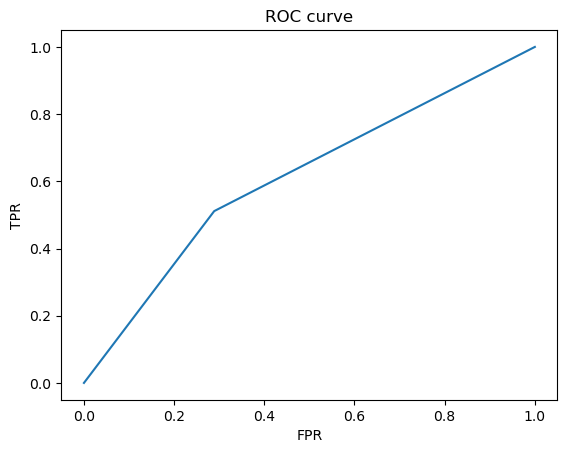

In [22]:
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()

In [23]:
f1_score(y_test, predictions)

0.5232558139534884

In [24]:
fbeta_score(y_test, predictions, beta=0.5)

0.5306603773584906

## **Decision Tree Regressor**

In [25]:
#Let's assume a REGRESSION problem! Let's predict the FARE paid by a person 
#(maybe not a very good problem but it serves its purpose)!
#Let's start by creating our X (input data) and our y (target feature - the Fare feature)
X = df.drop(["Fare"], axis=1)     #input features - everything except the Fare feature
y = df["Fare"].to_frame()         #target feature

In [36]:
#Let's use the X and Y, which contain 891 rows of data
#to create train and test sets of data.
#Important -> Define the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

#dropping categorical features from the input data (X_train and X_test)
X_train = X_train.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)  
X_test = X_test.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [31]:
#Create an instance of a Decision Tree regressor
#Again, defining the random_state for reproducibility
clf = DecisionTreeRegressor(random_state=2021)

In [32]:
#Training, i.e., fitting the model (using the training data!!)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [34]:
#obtaining predictions
predictions = clf.predict(X_test)
predictions

array([ 18.7875,   7.8958,  10.5   ,  27.9   ,  34.375 ,  24.15  ,
       211.5   ,   7.7417,  12.35  ,   7.2292,   7.2292,  52.    ,
        15.5   ,  18.7875,  13.    ,   8.6625,   8.05  ,  52.    ,
         8.6625,  35.5   ,  76.2917,  15.5   ,   7.6292,   8.4042,
         8.6625,   7.125 ,   7.775 ,   7.65  ,  93.5   ,  26.    ,
         7.8792,   8.6625,  39.6875,  16.1   , 113.275 ,  12.35  ,
         7.8958,   7.775 ,  29.7   ,  20.575 ,   7.8958,   7.75  ,
        33.5   ,   7.75  ,   7.8875,   8.1375,  69.55  ,   7.25  ,
        53.1   ,  13.    ,  78.2667,  27.75  ,  26.    ,  14.4542,
         7.25  ,  39.6875,  26.    ,   8.6625,  10.5   , 113.275 ,
        13.    ,  73.5   ,   7.05  ,  17.8   ,  59.4   ,  39.6875,
         8.05  ,  26.25  ,   7.25  ,   7.8958,  26.    ,  18.75  ,
         8.6625,   6.75  ,  46.9   ,  13.    , 113.275 ,   7.775 ,
        15.55  ,  11.2417,  27.    ,   7.2292,   0.    ,   7.225 ,
        69.55  ,   9.8375,  76.2917,  29.    ,  10.5   ,   7.8

#### Quality Metrics and Model Evaluation

In [37]:
mean_absolute_error(y_test, predictions)

14.68592556053812

In [38]:
mean_squared_error(y_test, predictions)

1399.7722041242152

In [39]:
root_mean_squared_error(y_test, predictions)

37.41352969347072

### Model Validation

#### **Cross_val_score**

In [46]:
'''
Load CSV
'''
df = pd.read_csv("titanic_dataset.csv") 

In [47]:
#Let's start by creating our X (input data) and our y (target feature - the Survived feature)
X = df.drop(["Survived"], axis=1)     #input features - everything except the Survived feature
y = df["Survived"].to_frame()         #target feature

In [48]:
print("USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...")
X = X.drop(['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked'], axis=1)   
clf = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2021)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

USING A DECISION TREE WITH cross_val_score (MEAN ACCURACY)...
[0.58888889 0.61797753 0.52808989 0.50561798 0.61797753 0.70786517
 0.70786517 0.70786517 0.59550562 0.74157303]
RESULT: 0.63 accuracy with a standard deviation of 0.08


#### **K-fold**

In [49]:
'''
Iterating manually (with K-fold, Repeated K-fold, Leave One Out, Shuffle Split, Stratified k-fold, TimeSeriesSplit, ...)
'''
print("USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...")
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2021)
scores = []
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    clf.fit(X.loc[train,:], y.loc[train,:])
    score = clf.score(X.loc[test,:], y.loc[test,:])
    scores.append(score)
    y_predicted = clf.predict(X.loc[test,:])
    print("Confusion Matrix:")
    print(confusion_matrix(y.loc[test,:], y_predicted))
    print(score)
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f" % (np.mean(scores), np.std(scores)))

USING A DECISION TREE WITH MANUAL ITERATION (KFold) and obtaining confusion matrix...
Confusion Matrix:
[[45  6]
 [27 12]]
0.6333333333333333
Confusion Matrix:
[[33 36]
 [ 8 12]]
0.5056179775280899
Confusion Matrix:
[[38 17]
 [19 15]]
0.5955056179775281
Confusion Matrix:
[[38  6]
 [24 21]]
0.6629213483146067
Confusion Matrix:
[[34 18]
 [17 20]]
0.6067415730337079
Confusion Matrix:
[[41 16]
 [ 9 23]]
0.7191011235955056
Confusion Matrix:
[[33 17]
 [13 26]]
0.6629213483146067
Confusion Matrix:
[[42 14]
 [15 18]]
0.6741573033707865
Confusion Matrix:
[[44 15]
 [10 20]]
0.7191011235955056
Confusion Matrix:
[[41 15]
 [14 19]]
0.6741573033707865
RESULT: 0.65 accuracy with a standard deviation of 0.06
